In [1]:
import pandas as pd 
import numpy as np 

/home/supriya/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.set_option('display.max_rows', None)

In [3]:
dataset = pd.read_csv('/home/supriya/Desktop/FDV/Nepali-News-Classification/Nepali_Dataset_New.csv')

In [4]:
dataset.sample(10)

,News,Category
1006,नेपाली र्‍याम्पमा जिनत अमानभरतीय फिल्ममा झन्डै...,entertainment
3617,"शक्तिको कीर्तिमानी ह्याटि्रक""क्रिकेटमा ह्याटि्...",sport
1339,"\n﻿राजविराज, २५ चैत । सप्तरीको मलेकपुर गाउँ वि...",politics
76,नेपाललाई औं साग आयोजनाको प्रस्तावभारतले औं द...,sport
3710,नीलु मिस टिनमिस टिन को अन्तिम प्रतिस्पर्धामा ...,entertainment
3630,प्रेमपछि लगनगाँठोआठ वर्षदेखिको घनिभूत प्रेम त...,entertainment
3050,"म्युजिक नेपाल पुरस्कार""म्युजिक नेपालको औं वाषि...",entertainment
1337,फेसबुकले लाईक बटनमा इमोसन पनि राख्याेफेसबुकको ...,tech
301,"""चित्रमा दुई देश समय सम्झना र बुद्ध""समयको चक्र...",entertainment
1819,"हेरुन्जेल रमाइलो""कलेज जीवनको प्रचुर यौवनावस्था...",entertainment


In [5]:
dataset['Category'].unique()

array(['politics', 'sport', 'entertainment', 'tech', 'business'],
      dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Category']= label_encoder.fit_transform(dataset['Category'])
dataset.head()

,News,Category
0,"\n﻿काठमाण्डौ, ६ असार । नेपाल ललितकला प्रज्ञा प...",2
1,नेपालको आशा जीवितैकप्तान पारस खड्काले ब्याट र ...,3
2,"\n﻿राजविराज, २६ फागुन । नेकपा एमालेलाई औद्योगि...",2
3,"सामाजिक कार्यका लागि सुन्दरी""\nसौन्दर्य प्रतिय...",1
4,"खराब प्रदर्शनपछि प्रशिक्षण पिच""महिला राष्ट्रिय...",3


### Splitting data into train and test

- stratify is used to ensure that the splitting process preserves the proportion of classes in the target variable y 

In [7]:
from sklearn.model_selection import train_test_split

X = dataset['News']
y = dataset['Category']
X_train , X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, stratify= y)

In [8]:
y_train.head()

2304    4
472     2
2129    1
953     1
1732    1
Name: Category, dtype: int64

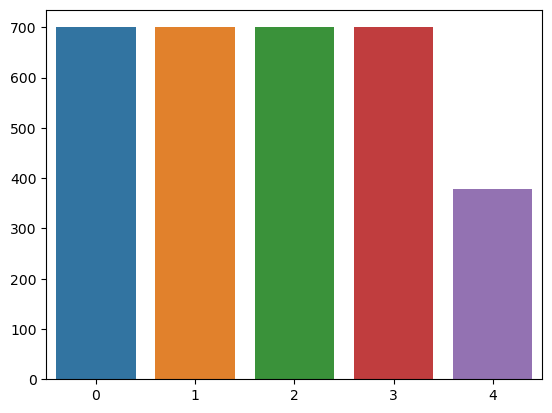

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['0','1', '2', '3', '4']),y=dd.values)
plt.show()

### Cleaning text 

- Removing characters (: , | , \n , , )

In [10]:
import re

def clean_text(string):
    clean_text = re.sub(r'[\n,|।\'":]', '', string)
    return clean_text

In [11]:
for text in X_train:
    cleaned_text = clean_text(text)

print(cleaned_text)

विश्व प्रसिद्ध गेम फार क्राई नेपाली कथामानेपाली कथा लोकेसन र पात्र प्रयोग गरिएको विश्व प्रसिद्ध भिडियो गेम फार क्राईको चौथो संस्करण रिलिज हुने भएको छ  	नेपाली कथा लोकेसन र पात्र प्रयोग गरिएको विश्व प्रसिद्ध भिडियो गेम फार क्राईको चौथो संस्करण रिलिज हुने भएको छ  गेमको यो संस्करणले अमेरिकीबाट किरात राज्यमा आमाको अस्तु लिएर आएको एक युवकको कथा भन्नेछ   	गेम नोभेम्बर  मा रिलिज हुँदैछ   बर्षअघि फार क्राई पहिलो पटक सार्वजनिक भएको थियो   	भिडियो गेमको प्रमुख नायक अजय घले हुनेछन् जो किरात राज्यमा जन्मिएर बुवाआमासँग अमेरिका पुगेका हुन्छन्  आमाले मृत्यु अघि आफ्नो अस्तु किरात राज्यमै पुर्याउन गरेको अनुरोध अनुसार अजय अस्तु बोकेर किरात राज्यमा प्रवेश गर्छन् तर छिर्दाछिर्दै राजा पागन मिङको पञ्जामा पर्छन्  	अजयका बुवा किरात राज्यका राजा विरोधी क्रान्तिकारी भएकाले पागन मिङले अजयलाई कब्जामा लिएका हुन्छन्  	फार क्राई  का निर्देशकद्वय मार्क थोम्प्सन र एलेक्स हुचिन्सनले एक अन्तर्वार्ताको क्रममा कथा तयार पार्नको लागि वास्तविक युद्ध भोगेकाहरुलाई भेट्न नेपाल आएको सुनाएका छन्  	सुरुमा हामीले गेममा राख्ने जनावर

In [12]:
X_train = X_train.apply(clean_text)

In [13]:
X_train.sample(10)

3359    झम्सीखेल सी डिभिजनमाझम्सीखेल युवा क्लब सहिद स्...
2646    दुःखी रानीसन् अस्सीमा एउटा गजब स्वर सुनिएको थि...
1212    ﻿राजविराज  स्थानीय तहको संरचना अव्यवहारिक एवम्...
41      आगामी राष्ट्रिय खेलकुद पूर्वाञ्चलमाआगामी सातौं...
2542     अर्बले मुलुक झिलिमिली हुन्थ्योसंविधानसभामा भए...
2666    सस्ता मोबाइल भन्सारमै रोकिएटाइप एप्रुभल गुणस्त...
421     ﻿राजविराज १४ वैशाख  सप्तरीको छिन्नमस्ता गाउँपा...
3970    दिनेशको अग्रता कायमैएमेच्योर दिनेश प्रजापतिले ...
4441    पहिलो गाईजात्रामा जो थिएधार्मिकबाहेक गाईजात्रा...
2224    ﻿राजविराज ८ चैत  संयुक्त लोकतान्त्रिक मधेशी मो...
Name: News, dtype: object

### Tokenization of text 


#### Using nepalitokenizers
- <b>About nepalitokenizers</b>
    
    nepalitokenizers provides access to pre-trained WordPiece and SentencePiece (Unigram) tokenizers for Nepali language, trained using HuggingFace's tokenizers library. It is a simple and short Python package tailored specifically for Nepali language with a default set of configurations for the normalizer, pre-tokenizer, post-processor, and decoder.

    link : https://soyuj.com/blog/nepali-tokenizers


In [14]:
from nepalitokenizers import WordPiece
from nltk.stem import PorterStemmer


In [15]:
tokenizer = WordPiece()

def tokenize_1(text):
    tokens = tokenizer.encode(text)
    return tokens.tokens


In [16]:
tokens = X_train.apply(tokenize_1)

print(tokens)

2304    [[CLS], बजारमा, भित्र, ##ियो, ग्यालेक्सी, एस, ...
472     [[CLS], राजविराज, २९, पुस, विही, ##वार, मध्यरा...
2129    [[CLS], भव, ##देव, पुरस्कार, ##हरू, ##भव, ##दे...
953     [[CLS], नर, ##्, ##भ, ##स, भइन्, तर, डरा, ##इन...
1732    [[CLS], नारी, ##ले, बाँध, ##्यो, ##कला, ##कारक...
4289    [[CLS], घले, च्याम्पियन, ##कालु, घलेले, विष्णु...
3272    [[CLS], उस, ##ु, टोली, भियतनाम, ##तर्फ, ##भि, ...
3234    [[CLS], राजविराज, ४, फागुन, यतिबेला, मधेशका, य...
290     [[CLS], ब्रु, ##नाई, ##बाट, कार्यपत्र, रुस, ##...
3162    [[CLS], बोध, ##राज, सुवेदी, /, मह, ##ुली, जेठ,...
1353    [[CLS], पत्या, ##एनन्, अभिनेत्री, ##हरूले, ##ठ...
2703    [[CLS], अश्, ##ले, ##षा, र, आइ, ##भन, च्याम्पि...
1854    [[CLS], क्ला, ##उड, टेक, सुरु, ##क्ला, ##उड, क...
1885    [[CLS], मोवाइल, ##मै, बजारको, गहना, छान्ने, सु...
3834    [[CLS], राजविराज, ४, वैशाख, सप्तरीका, पत्रकारह...
1897    [[CLS], वित्तीय, संघीयता, ##बारे, निजी, क्षेत्...
1836    [[CLS], प्रविधि, छाएको, विश्वकप, ##य, ##स, ##प...
4352    [[CLS]

Not so good result from nepalitokenizers

#### Using nepali-stemmer

- About nepali-stemmer

    simple Nepali stemmer. It iteratively separates out the suffixes (postpositions) until no more separation can be processed. The algorithm is based on hindi-stemmer.

    link : https://github.com/oya163/nepali-stemmer



In [17]:
from nepali_stemmer.stemmer import NepStemmer
nepstem = NepStemmer()
 
def tokenize_2(text):
    return nepstem.stem(text)

In [18]:
X_train.apply(tokenize_2)

2304    बजार मा भित्रियो ग्यालेक्सी एस विश्व भर अधिरता...
472     ﻿राजविराज २९ पुस विहीवार मध्यरात मा न्याय परिष...
2129    भवदेव पुरस्कारहरूभवदेव पन्त स्मृति प्रतिष्ठान ...
953     नर्भस भइन् तर डराइनन् मनीषाडिम्बाशय मा भए को क...
1732    नारी ले बाँध्योकलाकार को अलग वेषभुषा र भाषा जी...
4289    घले च्याम्पियनकालु घले ले विष्णुकुमार राई लाई ...
3272    उसु टोली भियतनामतर्फभियतनाम को होचिमिन्ह मा हु...
3234    ﻿राजविराज ४ फागुन यतिबेला मधेश का युवा जमात मा...
290     ब्रुनाई बाट कार्यपत्र रुस बाट टिप्पणीसाझा प्रक...
3162    ﻿बोधराज सुवेदी /महुली जेठ २५ गते स्थानीय तह को...
1353    पत्याएनन् अभिनेत्रीहरूलेठूलै आशा गरिए को मौसम ...
2703    अश्लेषा र आइभन च्याम्पियनदिदी अश्लेषा लिसानोभि...
1854    क्लाउड टेक सुरुक्लाउड कम्प्युटिङ लगायत प्रविधि...
1885    मोवाइल मै बजार को गहना छान्ने सुविधा गहना छान्...
3834    ﻿राजविराज ४ वैशाख सप्तरी का पत्रकार हरुले राखे...
1897    वित्तीय संघीयता बारे निजी क्षेत्रसंघीय खाका बन...
1836    प्रविधि छाए को विश्वकपयसपल्ट विश्वकप मा रेप को...
4352    सुन को

Better results than nepali-tokenisers

### Tokenizing using tokenizer_2

In [19]:
X_train.head(10)

2304    बजारमा भित्रियो ग्यालेक्सी एस विश्वभर अधिरताका...
472     ﻿राजविराज २९ पुस  विहीवार मध्यरातमा न्याय परिष...
2129    भवदेव पुरस्कारहरूभवदेव पन्त स्मृति प्रतिष्ठानल...
953     नर्भस भइन् तर डराइनन् मनीषाडिम्बाशयमा भएको क्य...
1732    नारीले बाँध्योकलाकारको अलग वेषभुषा र भाषा  जीव...
4289    घले च्याम्पियनकालु घलेले विष्णुकुमार राईलाई पछ...
3272    उसु टोली भियतनामतर्फभियतनामको होचिमिन्हमा हुने...
3234    ﻿राजविराज ४ फागुन  यतिबेला मधेशका युवा जमातमा ...
290     ब्रुनाईबाट कार्यपत्र रुसबाट टिप्पणीसाझा प्रकाश...
3162    ﻿बोधराज सुवेदी /महुली  जेठ २५ गते  स्थानीय तहक...
Name: News, dtype: object

In [20]:
X_train = X_train.apply(tokenize_2)

In [21]:
X_train.head(10)

2304    बजार मा भित्रियो ग्यालेक्सी एस विश्व भर अधिरता...
472     ﻿राजविराज २९ पुस विहीवार मध्यरात मा न्याय परिष...
2129    भवदेव पुरस्कारहरूभवदेव पन्त स्मृति प्रतिष्ठान ...
953     नर्भस भइन् तर डराइनन् मनीषाडिम्बाशय मा भए को क...
1732    नारी ले बाँध्योकलाकार को अलग वेषभुषा र भाषा जी...
4289    घले च्याम्पियनकालु घले ले विष्णुकुमार राई लाई ...
3272    उसु टोली भियतनामतर्फभियतनाम को होचिमिन्ह मा हु...
3234    ﻿राजविराज ४ फागुन यतिबेला मधेश का युवा जमात मा...
290     ब्रुनाई बाट कार्यपत्र रुस बाट टिप्पणीसाझा प्रक...
3162    ﻿बोधराज सुवेदी /महुली जेठ २५ गते स्थानीय तह को...
Name: News, dtype: object

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/supriya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/supriya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    nep_stopwords = set(stopwords.words('nepali'))
    
    # Tokenize the input text into words
    words = text.split()
    
    # Remove stopwords from the text while maintaining original structure
    filtered_words = [word for word in words if word.lower() not in nep_stopwords]
    
    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text



In [25]:
X_train.head()

2304    बजार मा भित्रियो ग्यालेक्सी एस विश्व भर अधिरता...
472     ﻿राजविराज २९ पुस विहीवार मध्यरात मा न्याय परिष...
2129    भवदेव पुरस्कारहरूभवदेव पन्त स्मृति प्रतिष्ठान ...
953     नर्भस भइन् तर डराइनन् मनीषाडिम्बाशय मा भए को क...
1732    नारी ले बाँध्योकलाकार को अलग वेषभुषा र भाषा जी...
Name: News, dtype: object

In [26]:

X_train= X_train.apply(remove_stopwords)

In [27]:
X_train.head()

2304    बजार भित्रियो ग्यालेक्सी एस विश्व अधिरता प्रती...
472     ﻿राजविराज २९ पुस विहीवार मध्यरात न्याय परिषद् ...
2129    भवदेव पुरस्कारहरूभवदेव पन्त स्मृति प्रतिष्ठान ...
953     नर्भस भइन् डराइनन् मनीषाडिम्बाशय क्यान्सर शल्य...
1732    नारी बाँध्योकलाकार वेषभुषा भाषा जीवन्त प्रस्तु...
Name: News, dtype: object

In [28]:
# rev_len = [len(i) for i in X_train]
# pd.Series(rev_len).hist()

### Word Embeddings

In [42]:
X_train.shape

(3178,)

In [43]:
corpus = list(X_train)

In [30]:
# print(corpus)

In [31]:
# review_1 = "good movie but bad script" 
# review_2 = "action was good but movie was bad."

In [32]:
# corpus = [review_1, review_2]

#### Using CountVectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
type(X)

scipy.sparse._csr.csr_matrix

In [50]:
feature_names = vectorizer.get_feature_names_out()

# Printing some samples of the features
print("Sample features:")
for feature in feature_names[:20]:  # Adjust the number (10) to view more or fewer samples
    print(feature)

Sample features:
12040
406
þत
अइ
अए
अक
अकथ
अकबर
अकमक
अकमल
अकर
अकल
अकलघर
अकलबह
अकवर
अकवल
अकस
अख
अखट
अखड


In [53]:
vectorizer = CountVectorizer(max_features=500)
X = vectorizer.fit_transform(corpus)
X = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [54]:
X.shape

(3178, 500)

In [58]:
y_train.shape

(3178,)

### Create Custom Dataset

In [124]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset
import torch

In [62]:
class NewsDataset(Dataset):
    
    def __init__(self,x_vectorized,y_encoded):
        self.x_vectorized = x_vectorized
        self.y_encoded = y_encoded
        
    
    def __len__(self):
        return len(self.x_vectorized)
    
    
    def __getitem__(self,index):
        return self.x_vectorized[index],self.y_encoded[index]
    

In [126]:
train_data = train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))

TypeError: expected np.ndarray (got Series)

In [64]:
data = NewsDataset(X, y_train)
print('length of our dataset : ' , len(data))

# print(dataset[2])

length of our dataset :  3178


### creating a Neural Netwrork 

In [106]:
train_indices,test_indices = train_test_split(list(range(0,len(data))),test_size=0.25,random_state=42)

In [107]:
print(len(train_indices))
print(len(test_indices))

2383
795


Using SubsetRandomSampler to pass to sampler 
- In PyTorch, a sampler is an object used by data loaders to specify the strategy for selecting data samples during training. It determines the order in which samples are accessed from the dataset and passed to the model during each training iteration.
- This sampler randomly samples a fixed number of indices from a given list  of indices. It's useful for creating train/validation splits or for selecting a random subset of the data.

In [108]:
from torch.utils.data.sampler import SubsetRandomSampler

In [109]:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

Converting to DataLoader

In [110]:
import torch
import torch.nn as nn



In [121]:
batch_size  = 50
train_loader = torch.utils.data.DataLoader(data, batch_size= batch_size)
validation_loader = torch.utils.data.DataLoader(data, batch_size= batch_size)


In [122]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)


print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output: \n', sample_y)

KeyError: 0

Building Neural Network 

In [112]:
class DenseNetwork(nn.Module):
    
    def __init__(self):
        super(DenseNetwork,self).__init__()
        self.fc1 = nn.Linear(500,250)
        self.drop1 = nn.Dropout(0.4)
        self.fc2 = nn.Linear(250,100)
        self.drop2 = nn.Dropout(0.4)
        self.prediction = nn.Linear(100,5)
        
    def forward(self,x):
        
        x = F.relu(self.fc1(x.to(torch.float)))
        x = self.drop1(x)
        x = F.relu(self.fc2(x))
        x = self.drop2(x)
        x = F.log_softmax(self.prediction(x),dim=1)
        
        return x

In [113]:
device = torch.device("cuda")
device

device(type='cuda')

In [114]:
model = DenseNetwork()

In [115]:

import torch.optim as optim

In [116]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(),lr=1e-3)

Training the network

In [119]:
EPOCHS = 6
TRAIN_LOSSES = []
TRAIN_ACCURACIES = []

for epoch in range(1, EPOCHS + 1):
    epoch_loss = 0.0
    epoch_true = 0
    epoch_total = 0
    for data_, target_ in train_loader:
        # Cleaning optimizer cache.
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(data_)
        
        # Computing loss
        loss = criterion(outputs, target_)
        
        # Backward propagation
        loss.backward()
        
        # Applying gradients
        optimizer.step()
        
        epoch_loss += loss.item()
        
        # Moving predictions and targets to CPU
        _, pred = torch.max(outputs.cpu(), dim=1)
        epoch_true += torch.sum(pred == target_.cpu()).item()
        
        epoch_total += target_.size(0)
        
    TRAIN_LOSSES.append(epoch_loss)
    TRAIN_ACCURACIES.append(100 * epoch_true / epoch_total)
    
    print(f"Epoch {epoch}/{EPOCHS} finished: train_loss = {epoch_loss}, train_accuracy = {TRAIN_ACCURACIES[epoch-1]}")


KeyError: 2699

In [ ]:
y_train.unique()

array([4, 2, 1, 3, 0])

In [ ]:
label_map = {
    
}

(3178,)

#### Using TfidfVectorizer

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
class Vectorizer():
    def __init__(self,max_features=None):
        self.max_features = max_features
        self.tfidf = TfidfVectorizer(max_features=self.max_features)
        self.builded = False
        
    
    
    
    def _set_tfidf(self,texts):
        self.tfidf.fit(texts)
    
    def build_vectorizer(self,texts):
        self._set_tfidf(texts)
    def build_vectorizer(self,texts):
            self._set_tfidf(texts)
            self.builded = True
        
    def vectorizeTexts(self,texts):
        if self.builded:
            return self.tfidf.transform(texts)
        
        else:
            raise Exception("Vectorizer is not builded.")
            
            

In [ ]:
x = list(X_train)
# y = list(data["class"])

In [ ]:
vectorizer = Vectorizer(max_features=7000)

In [ ]:
vectorizer.build_vectorizer(x)

In [ ]:
nepali_corpus = X_train

In [ ]:
from gensim.models import Word2Vec
import multiprocessing

In [ ]:
model = Word2Vec(sentences=nepali_corpus, vector_size=100, window=5, min_count=1, workers=multiprocessing.cpu_count())

model.save("nepali_word2vec.model")

In [ ]:
model.wv.similarity('समाज', 'राष्ट्रिय')


KeyError: "Key 'समाज' not present"